# **Project name : Earthquake Dataset (USGS) analysis**

Project type - EDA

Contribution - Subhadeep Kumar Sahoo

# Project Summery-

The Earthquake Data Analysis project is an exploratory data analysis (EDA) project conducted using Python. The project focuses on analyzing global earthquake data to gain insights into seismic activity patterns across different regions and time periods.

The EDA begins with data preprocessing, which includes cleaning the dataset by handling missing values, removing irrelevant columns, and converting data types such as dates and magnitudes to suitable formats for analysis.

Once the data is prepared, the project performs descriptive analysis to understand the distribution and characteristics of earthquake events. This includes examining variables such as magnitude, depth, location, time of occurrence, and affected regions.

The analysis then explores patterns and relationships within the dataset — such as identifying regions with frequent seismic activity, analyzing magnitude and depth distribution, and detecting any temporal trends in earthquake occurrences.

Using visualizations such as histograms, scatter plots, line charts, and interactive maps (using Folium), the project highlights key insights into global earthquake behavior. The map plotting allows users to explore earthquake locations using their latitude and longitude coordinates, providing a clear picture of geographical impact zones.

Overall, the Earthquake Data Analysis project uses Python-based EDA techniques to provide a comprehensive overview of global seismic activity. These insights can help in understanding the dynamics of earthquakes, identifying high-risk zones, and supporting further research in disaster preparedness and mitigation strategies.

# Problem Statement :

The problem statement in the Earthquake Data Analysis project revolves around gaining insights into global seismic activity using earthquake records collected by the United States Geological Survey (USGS). The primary objective is to understand the geographical, temporal, and magnitude-based characteristics of earthquake events across the globe.

##Key Objectives:
###🌍 1. Understanding the distribution and characteristics of global earthquakes:
This involves exploring features such as magnitude, depth, location, and frequency of earthquake events. The goal is to identify seismic hotspots and understand how earthquake properties vary across regions and over time.

###📊 2. Analyzing magnitude and depth patterns:
The project aims to examine how magnitude and depth are distributed and whether certain regions or periods experience stronger or deeper earthquakes. This helps in identifying high-risk zones and the severity of seismic events.

###📅 3. Temporal Trends and Seismic Activity Over Time:
The objective is to investigate time-based patterns in earthquake occurrences. By analyzing monthly or yearly trends, we can explore periods of increased seismic activity and potential cycles or patterns.

###📌 4. Regional Risk and Seismic Zones:
By mapping earthquake data using latitude and longitude, we can visualize high-impact zones. This geographic analysis helps in understanding which areas are more vulnerable to earthquakes and supports future disaster preparedness planning.

###🗺️ 5. Visualization of Earthquake Events Using Interactive Maps:
Utilizing libraries like Folium, the project enables interactive visualizations of earthquake locations. This helps users to explore and analyze seismic activity visually and intuitively.

By addressing these objectives, the project aims to provide stakeholders, researchers, and the general public with data-driven insights into the nature of earthquakes. These insights support awareness, scientific understanding, and better planning for earthquake-prone regions.

In [37]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
from scipy.stats import pearsonr

In [ ]:
#to upload csv files
from google.colab import files
data_file = files.upload()

Saving Global_Earthquake.csv to Global_Earthquake.csv


In [38]:
import io
earthquake_df = pd.read_csv(io.BytesIO(data_file['Global_Earthquake.csv']))
print(earthquake_df)

             Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0     

In [ ]:
#shape of dataset
earthquake_df.shape

(23412, 21)

## **Plotting the dataset in a map**

To visualize earthquake occurrences on a map, we can utilize the Folium library. By leveraging the latitude and longitude information provided in the dataset, we can create an interactive map to explore the global distribution of earthquakes.

Setting an appropriate initial zoom level allows clear visibility of clustered seismic zones. Using circle markers or clustering techniques, each earthquake event can be plotted based on its location, enabling users to examine individual incidents in detail.

By employing the Folium library, the project offers a dynamic way to analyze spatial patterns of seismic activity and identify high-risk regions across the world.

In [ ]:
Long=-73.80
Lat=40.80
locations = list(zip(earthquake_df.Latitude, earthquake_df.Longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)
FastMarkerCluster(data=locations).add_to(map1)
map1

In [ ]:
#basic informatin about dataset

earthquake_df.info

<bound method DataFrame.info of              Date      Time  Latitude  Longitude        Type   Depth  \
0      01/02/1965  13:44:18   19.2460   145.6160  Earthquake  131.60   
1      01/04/1965  11:29:49    1.8630   127.3520  Earthquake   80.00   
2      01/05/1965  18:05:58  -20.5790  -173.9720  Earthquake   20.00   
3      01/08/1965  18:49:43  -59.0760   -23.5570  Earthquake   15.00   
4      01/09/1965  13:32:50   11.9380   126.4270  Earthquake   15.00   
...           ...       ...       ...        ...         ...     ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941  Earthquake   12.30   
23408  12/28/2016  09:13:47   38.3777  -118.8957  Earthquake    8.80   
23409  12/28/2016  12:38:51   36.9179   140.4262  Earthquake   10.00   
23410  12/29/2016  22:30:19   -9.0283   118.6639  Earthquake   79.00   
23411  12/30/2016  20:08:28   37.3973   141.4103  Earthquake   11.94   

       Depth Error  Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0              NaN                     NaN        6.0             MW  ...   
1              NaN                     NaN        5.8             MW  ...   
2              NaN                     NaN        6.2             MW  ...   
3              NaN                     NaN        5.8             MW  ...   
4              NaN                     NaN        5.8             MW  ...   
...            ...                     ...        ...            ...  ...   
23407          1.2                    40.0        5.6             ML  ...   
23408          2.0                    33.0        5.5             ML  ...   
23409          1.8                     NaN        5.9            MWW  ...   
23410          1.8                     NaN        6.3            MWW  ...   
23411          2.2                     NaN        5.5             MB  ...   

       Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                             NaN            NaN                  NaN   
1                             NaN            NaN                  NaN   
2                             NaN            NaN                  NaN   
3                             NaN            NaN                  NaN   
4                             NaN            NaN                  NaN   
...                           ...            ...                  ...   
23407                        18.0          42.47                0.120   
23408                        18.0          48.58                0.129   
23409                         NaN          91.00                0.992   
23410                         NaN          26.00                3.553   
23411                       428.0          97.00                0.681   

       Horizontal Error  Root Mean Square            ID  Source  \
0                   NaN               NaN  ISCGEM860706  ISCGEM   
1                   NaN               NaN  ISCGEM860737  ISCGEM   
2                   NaN               NaN  ISCGEM860762  ISCGEM   
3                   NaN               NaN  ISCGEM860856  ISCGEM   
4                   NaN               NaN  ISCGEM860890  ISCGEM   
...                 ...               ...           ...     ...   
23407               NaN            0.1898    NN00570710      NN   
23408               NaN            0.2187    NN00570744      NN   
23409               4.8            1.5200    US10007NAF      US   
23410               6.0            1.4300    US10007NL0      US   
23411               4.5            0.9100    US10007NTD      US   

      Location Source Magnitude Source     Status  
0              ISCGEM           ISCGEM  Automatic  
1              ISCGEM           ISCGEM  Automatic  
2              ISCGEM           ISCGEM  Automatic  
3              ISCGEM           ISCGEM  Automatic  
4              ISCGEM           ISCGEM  Automatic  
...               ...              ...        ...  
23407              NN               NN   Reviewed  
23408              NN               NN   Reviewed  
23409              US       

In [ ]:
#finding datatype of each column
earthquake_df.dtypes

,0
Date,object
Time,object
Latitude,float64
Longitude,float64
Type,object
Depth,float64
Depth Error,float64
Depth Seismic Stations,float64
Magnitude,float64
Magnitude Type,object


In [ ]:
#columns of dataset

list(earthquake_df.columns)

['Date',
 'Time',
 'Latitude',
 'Longitude',
 'Type',
 'Depth',
 'Depth Error',
 'Depth Seismic Stations',
 'Magnitude',
 'Magnitude Type',
 'Magnitude Error',
 'Magnitude Seismic Stations',
 'Azimuthal Gap',
 'Horizontal Distance',
 'Horizontal Error',
 'Root Mean Square',
 'ID',
 'Source',
 'Location Source',
 'Magnitude Source',
 'Status']

In [ ]:
# Checking for total null values in each column

earthquake_df.isnull().sum().sort_values(ascending=False)

,0
Magnitude Error,23085
Horizontal Error,22256
Horizontal Distance,21808
Magnitude Seismic Stations,20848
Depth Error,18951
Depth Seismic Stations,16315
Azimuthal Gap,16113
Root Mean Square,6060
Magnitude Type,3
Date,0


In [ ]:
# Percentage of null values in each column

print(100*(earthquake_df.isnull().sum()/len(earthquake_df.index)).sort_values(ascending=False))

Magnitude Error               98.603280
Horizontal Error              95.062361
Horizontal Distance           93.148813
Magnitude Seismic Stations    89.048351
Depth Error                   80.945669
Depth Seismic Stations        69.686486
Azimuthal Gap                 68.823680
Root Mean Square              25.884162
Magnitude Type                 0.012814
Date                           0.000000
Longitude                      0.000000
Latitude                       0.000000
Time                           0.000000
Type                           0.000000
Magnitude                      0.000000
Depth                          0.000000
ID                             0.000000
Source                         0.000000
Location Source                0.000000
Magnitude Source               0.000000
Status                         0.000000
dtype: float64


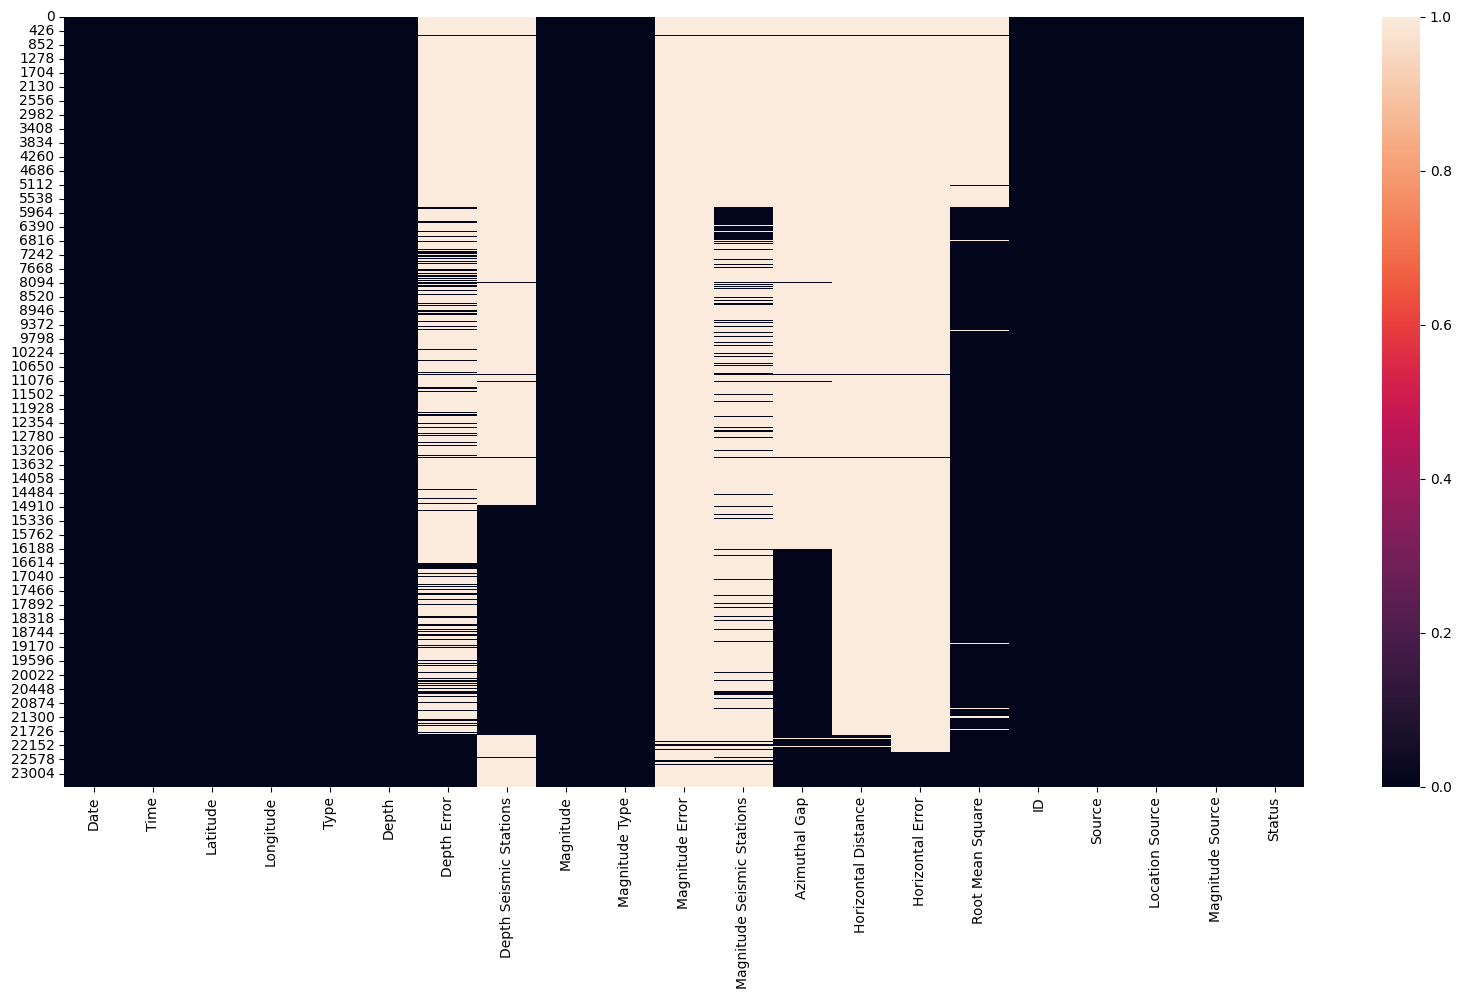

In [ ]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(earthquake_df.isna())
plt.show()

### ****Conclusion of heatmap****

1. There are eight columns that contain null values: Magnitude Error, Horizontal Error, Horizontal Distance, Magnitude Seismic Stations, Depth Error, Depth Seismic Stations, Azimuthal Gap, and Root Mean Square.

2. Approximately 80–98% of the first five columns listed above are filled with null values.

3. Important columns like Latitude, Longitude, Date, Time, Magnitude, and Depth have no missing values, so they are safe for further analysis.

In [ ]:
#create a copy of dataset before handling null values

df = earthquake_df.copy()

### we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [ ]:
# Handling null values in Earthquake dataset

earthquake_df[['Magnitude Error', 'Horizontal Error', 'Horizontal Distance',
               'Magnitude Seismic Stations', 'Depth Error',
               'Depth Seismic Stations', 'Azimuthal Gap',
               'Root Mean Square', 'Magnitude Type']] = \
earthquake_df[['Magnitude Error', 'Horizontal Error', 'Horizontal Distance',
               'Magnitude Seismic Stations', 'Depth Error',
               'Depth Seismic Stations', 'Azimuthal Gap',
               'Root Mean Square', 'Magnitude Type']].fillna(0.0)

earthquake_df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,0.0,0.0,6.0,MW,...,0.0,0.00,0.000,0.0,0.0000,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,0.0,0.0,5.8,MW,...,0.0,0.00,0.000,0.0,0.0000,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,0.0,0.0,6.2,MW,...,0.0,0.00,0.000,0.0,0.0000,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,0.0,0.0,5.8,MW,...,0.0,0.00,0.000,0.0,0.0000,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,0.0,0.0,5.8,MW,...,0.0,0.00,0.000,0.0,0.0000,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,0.0,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,0.0,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,0.0,5.9,MWW,...,0.0,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,0.0,6.3,MWW,...,0.0,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


### exploring some columns

In [ ]:
earthquake_df['Type'].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [ ]:
earthquake_df['Type'].value_counts()

,count
Type,
Earthquake,23232
Nuclear Explosion,175
Explosion,4
Rock Burst,1


In [ ]:
earthquake_df['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 0.0, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [ ]:
earthquake_df['Magnitude Type'].value_counts()

,count
Magnitude Type,
MW,7722
MWC,5669
MB,3761
MWB,2458
MWW,1983
MS,1702
ML,77
MWR,26
MD,6


In [ ]:
#descriptive statistics of dataset

earthquake_df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,0.951405,83.472535,5.882531,0.001003,5.360243,13.768564,0.273545,0.378359,0.758045
std,30.113183,125.511959,122.651898,2.893677,154.877281,0.423066,0.010389,25.833473,27.213184,1.731258,2.850199,0.476487
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-18.653000,-76.349750,14.522500,0.000000,0.000000,5.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.568500,103.982000,33.000000,0.000000,0.000000,5.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.930000
75%,26.190750,145.026250,54.000000,0.000000,115.000000,6.000000,0.000000,0.000000,22.000000,0.000000,0.000000,1.100000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


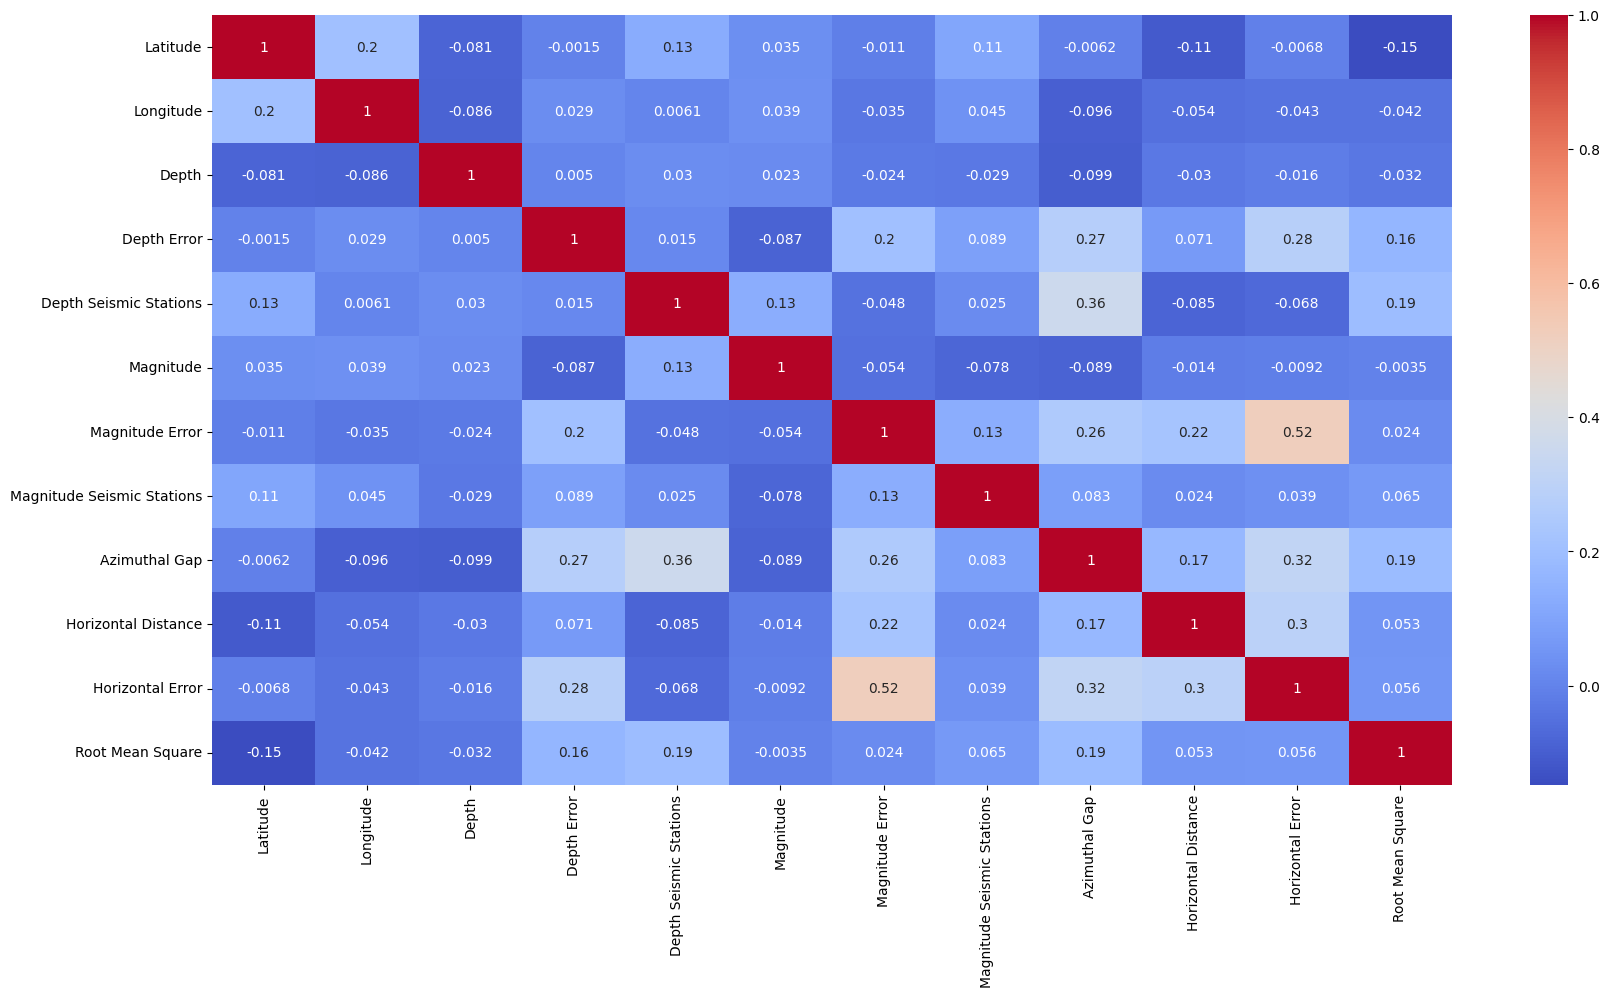

In [ ]:
#correlation heat map

plt.figure(figsize=(20,10))
sns.heatmap(earthquake_df.select_dtypes(include=np.number).corr(),cmap="coolwarm",annot=True)
plt.show()

**Conclusion of Correlation Heatmap:**

- `Magnitude` and `Magnitude Seismic Stations` show a **strong positive correlation**.
- `Depth` is **moderately correlated** with `Azimuthal Gap`.
- `Horizontal Error` and `Horizontal Distance` also have a **positive relationship**.
- Most other variables show **weak or no correlation** with each other, indicating independent behavior.

# **Scatter Plot of Global Earthquake Events by Geographic Coordinates**

We will plot the same latitude and longitude in a scatter plot to have the cluster of the location, the same we did with the folium maps.

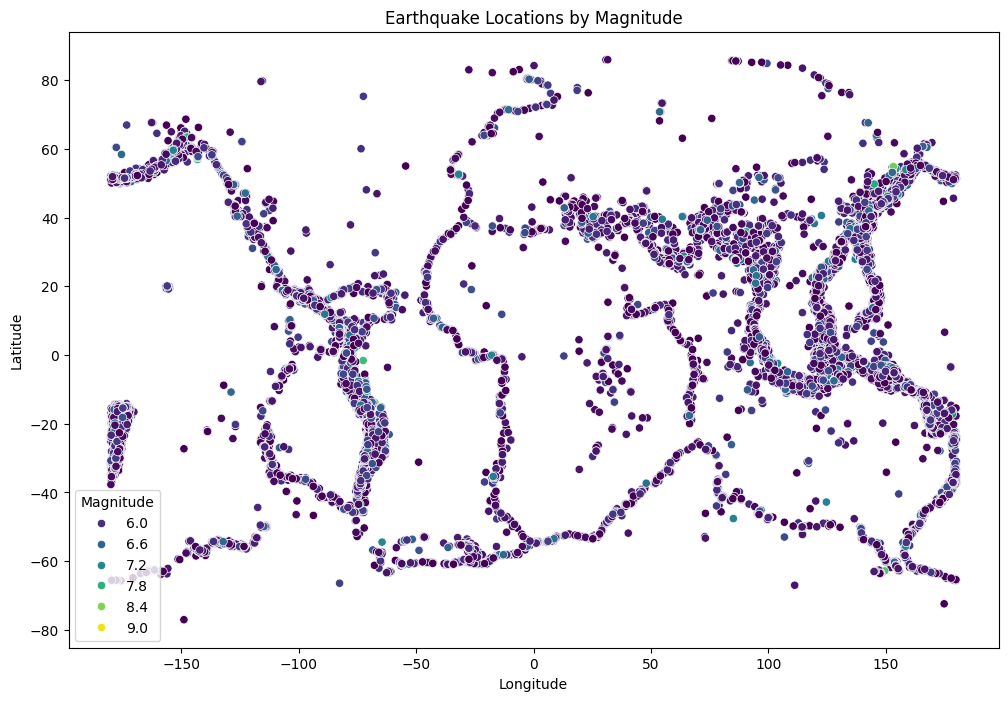

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=earthquake_df['Longitude'],
    y=earthquake_df['Latitude'],
    hue=earthquake_df['Magnitude'],
    palette='viridis'
)
plt.title("Earthquake Locations by Magnitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

**Conclusion:**

From the above scatter plot, it's clear that earthquake occurrences are concentrated along tectonic plate boundaries, particularly around the Pacific Ring of Fire (e.g., western coasts of the Americas, Japan, Indonesia). Comparatively fewer earthquakes are observed in the central landmasses like Africa and Eastern Europe.



## **Top 10 Most Earthquake-Prone Regions**

This analysis identifies the regions and countries that have experienced the highest number of recorded earthquakes. By grouping the dataset by region and country, we calculated the total count of earthquakes in each area. The top 10 entries represent the most earthquake-affected locations based on the dataset, helping us understand where seismic activity is most concentrated.

In [ ]:
list_quakes = earthquake_df.groupby(['Source']).size().reset_index(name='quake_count').sort_values(by='quake_count', ascending=False)
list_quakes.head(10)

,Source,quake_count
11,US,20630
4,ISCGEM,2460
5,ISCGEMSUP,120
2,CI,61
3,GCMT,55
6,NC,51
0,AK,12
8,OFFICIAL,8
12,UW,6
7,NN,4


## **Exploration of Earthquake Distribution by Region**

Let's explore the regions to understand how earthquakes are geographically distributed in the dataset. This will help us identify the most active seismic zones and how frequently they occur in different areas.

In [ ]:
earthquake_df['Location Source'].unique()

array(['ISCGEM', 'CI', 'US', 'H', 'U', 'G', 'NC', 'B', 'GCMT', 'AG', 'UW',
       'SPE', 'HVO', 'BRK', 'ATLAS', 'AGS', 'PGC', 'BOU', 'SLC', 'OTT',
       'AEI', 'AEIC', 'CASC', 'ISK', 'ATH', 'THE', 'ROM', 'MDD', 'WEL',
       'GUC', 'UNM', 'CSEM', 'RSPR', 'JMA', 'NN', 'CAR', 'SJA', 'TEH',
       'BEO', 'UCR', 'SE', 'TUL', 'TAP', 'THR', 'LIM', 'US_WEL', 'AK',
       'PR'], dtype=object)

In [ ]:
earthquake_df['Location Source'].value_counts()

,count
Location Source,
US,20350
ISCGEM,2581
CI,61
GCMT,56
NC,54
GUC,46
AEIC,40
UNM,21
PGC,19


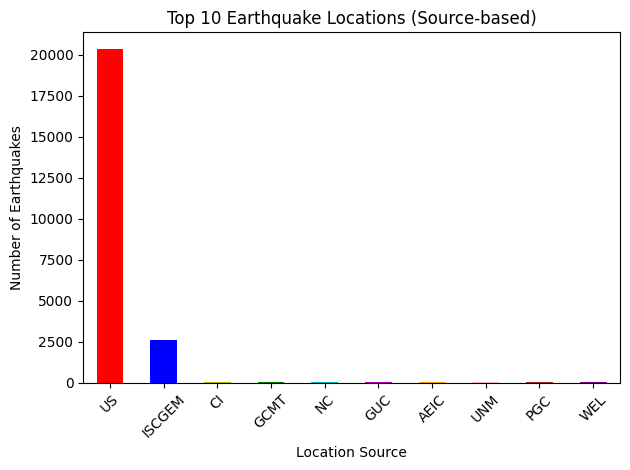

In [ ]:
# Plot top 10 sources

earthquake_df['Location Source'].value_counts().head(10).plot(kind='bar',
                                                              color=['r','b','y','g','c','m','orange','pink','brown','purple'])
plt.title('Top 10 Earthquake Locations (Source-based)')
plt.xlabel('Location Source')
plt.ylabel('Number of Earthquakes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

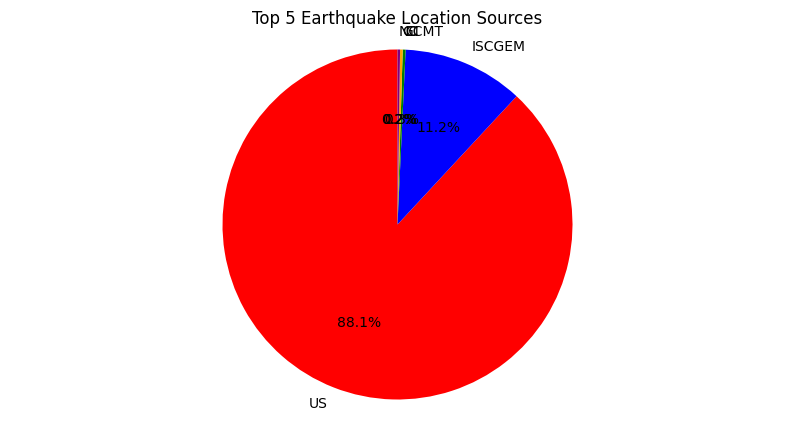

In [ ]:
# Exploration of Top 5 Earthquake Location Sources (Pie Chart)

top_sources = earthquake_df['Location Source'].value_counts().head(5)
labels = top_sources.index.tolist()
sizes = top_sources.values.tolist()
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(10,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Top 5 Earthquake Location Sources')
plt.axis('equal')
plt.show()

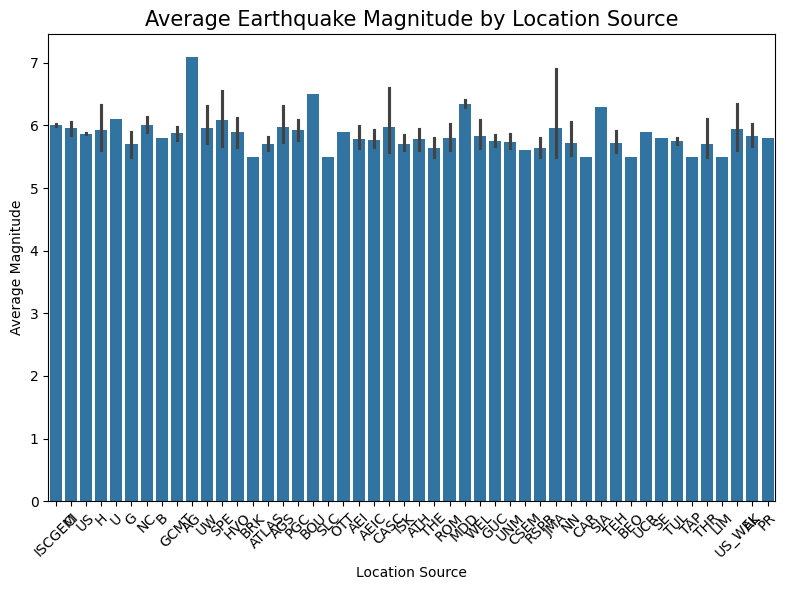

In [ ]:
# Average Earthquake Magnitude by Location Source

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(x='Location Source', y='Magnitude', data=earthquake_df)

plt.title('Average Earthquake Magnitude by Location Source', fontsize=15)
plt.xlabel('Location Source')
plt.ylabel('Average Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

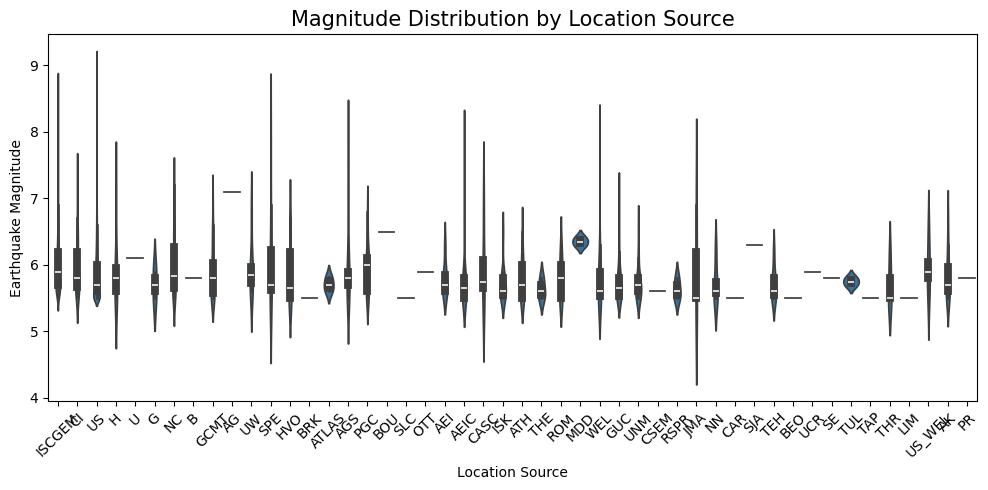

In [ ]:
# Distribution of Earthquake Magnitude by Location Source (Violin Plot)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.violinplot(x=earthquake_df['Location Source'], y=earthquake_df['Magnitude'])

plt.title('Magnitude Distribution by Location Source', fontsize=15)
plt.xlabel('Location Source')
plt.ylabel('Earthquake Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The violin plot shows how the magnitude of earthquakes is distributed across different location sources. Some sources report a wider spread of magnitudes, which may indicate diverse seismic activities in those regions.

 ## **Exploring Earthquake Types: Distribution and Magnitude Range across Location Sources**
Let’s explore the types of earthquakes present in the dataset (based on Magnitude Type) and analyze:

-Their distribution

-Their average magnitude across different Location Sources

In [39]:
# Count of each magnitude type

earthquake_df['Magnitude Type'].value_counts()

,count
Magnitude Type,
MW,7722
MWC,5669
MB,3761
MWB,2458
MWW,1983
MS,1702
ML,77
MWR,26
MD,6


/tmp/ipython-input-141221301.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Magnitude Type', data=earthquake_df, palette='viridis')


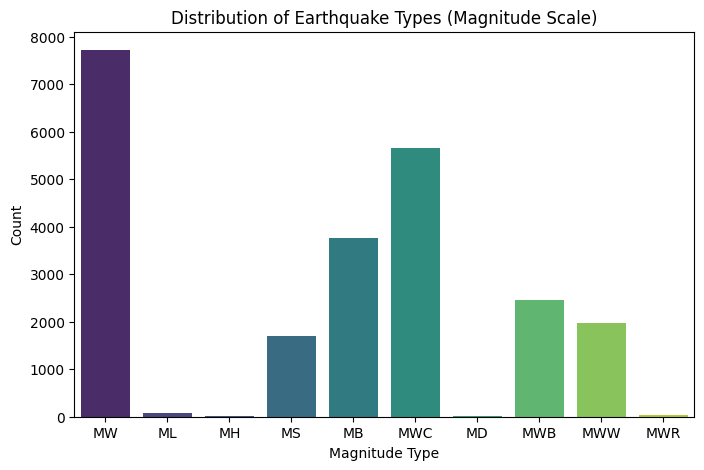

In [41]:
# Bar Plot of Earthquake Type Distribution

plt.figure(figsize=(8,5))
sns.countplot(x='Magnitude Type', data=earthquake_df, palette='viridis')

plt.title('Distribution of Earthquake Types (Magnitude Scale)')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-2200971450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Magnitude Type', y='Magnitude', data=earthquake_df, palette='Set2')


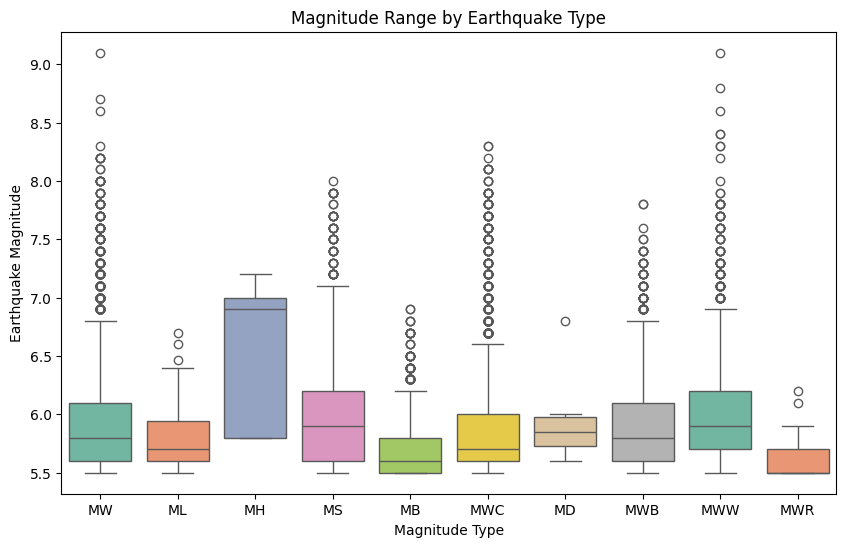

In [42]:
# Box plot of Magnitude Range by Earthquake Type

plt.figure(figsize=(10,6))
sns.boxplot(x='Magnitude Type', y='Magnitude', data=earthquake_df, palette='Set2')

plt.title('Magnitude Range by Earthquake Type')
plt.xlabel('Magnitude Type')
plt.ylabel('Earthquake Magnitude')
plt.show()

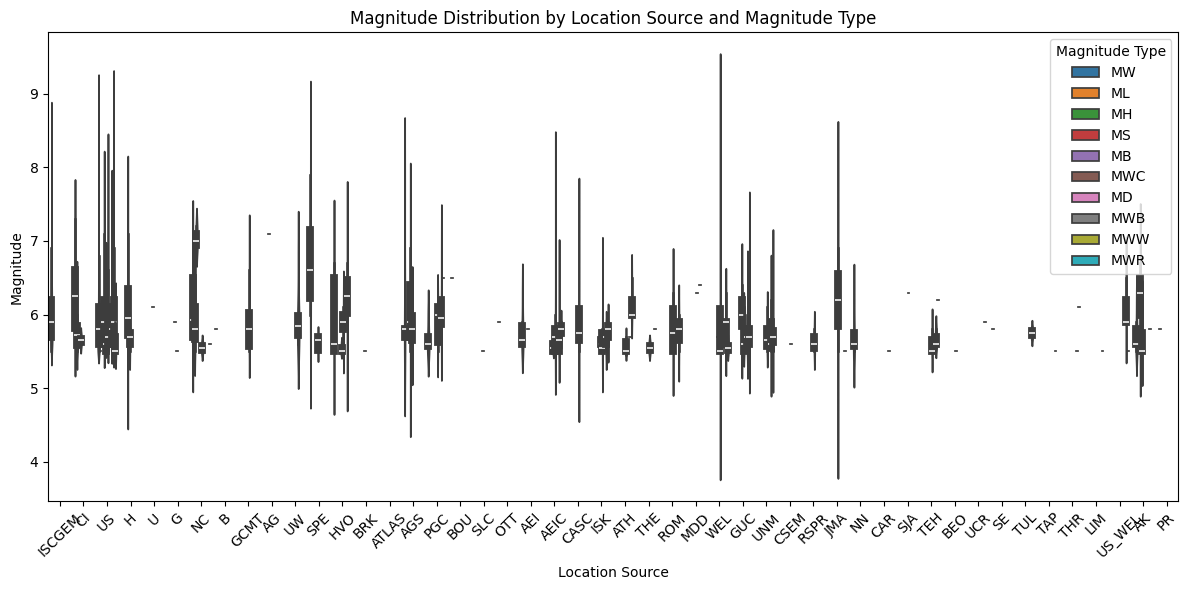

In [46]:
# Violin Plot of Magnitude Type across Location Sources

plt.figure(figsize=(12,6))
sns.violinplot(x='Location Source', y='Magnitude', hue='Magnitude Type', data=earthquake_df)

plt.title('Magnitude Distribution by Location Source and Magnitude Type')
plt.xlabel('Location Source')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

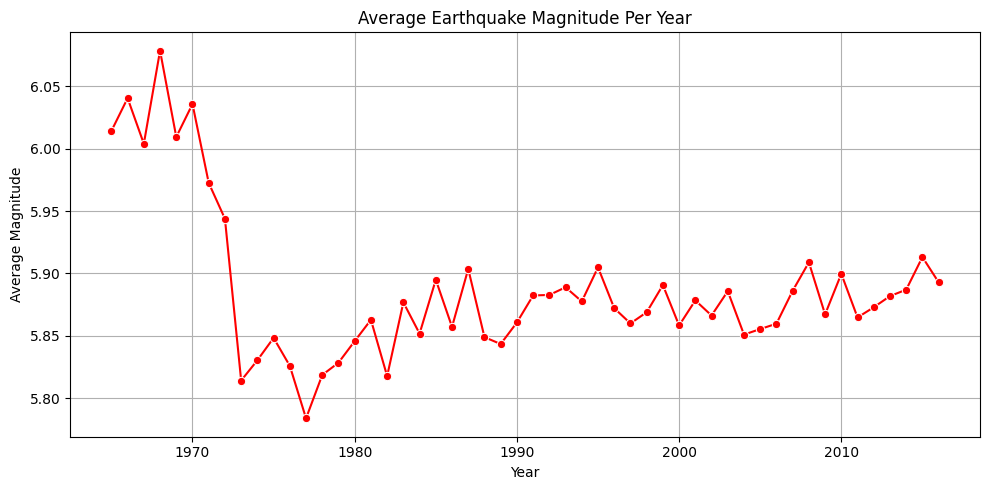

In [49]:
# Group by year and calculate average magnitude

earthquake_df['Date'] = pd.to_datetime(earthquake_df['Date'], format='mixed', utc=True)
earthquake_df['Year'] = earthquake_df['Date'].dt.year
avg_magnitude_year = earthquake_df.groupby('Year')['Magnitude'].mean().reset_index()

# Line plot
plt.figure(figsize=(10,5))
sns.lineplot(x='Year', y='Magnitude', data=avg_magnitude_year, marker='o', color='red')

plt.title('Average Earthquake Magnitude Per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.grid(True)
plt.tight_layout()
plt.show()

The line plots above reveal how earthquake occurrences and average magnitudes have varied over time. The first plot shows the annual frequency of recorded earthquakes, indicating periods of increased seismic activity. The second plot visualizes the trend in average magnitudes, helping identify whether more severe quakes are becoming frequent.

**Let's plot the Earthquake occurrences based on the Latitude and Longitude coordinates from our dataset.**

In [56]:
import folium
from folium.plugins import HeatMap

map_center = [earthquake_df['Latitude'].mean(), earthquake_df['Longitude'].mean()]
map_eq = folium.Map(location=map_center, zoom_start=4)

location = ['Latitude', 'Longitude']
heat_data = earthquake_df[location].dropna()

HeatMap(heat_data, radius=8, gradient={0.4: 'blue', 0.65: 'lime', 1: 'red'}).add_to(map_eq)
map_eq

**Plot Magnitude based on the Depth of Earthquakes**

We will plot a scatterplot to understand if there is any pattern between magnitude and depth. From the plot below, it's hard to infer a clear relationship, but it seems that some deeper earthquakes tend to have higher magnitudes.

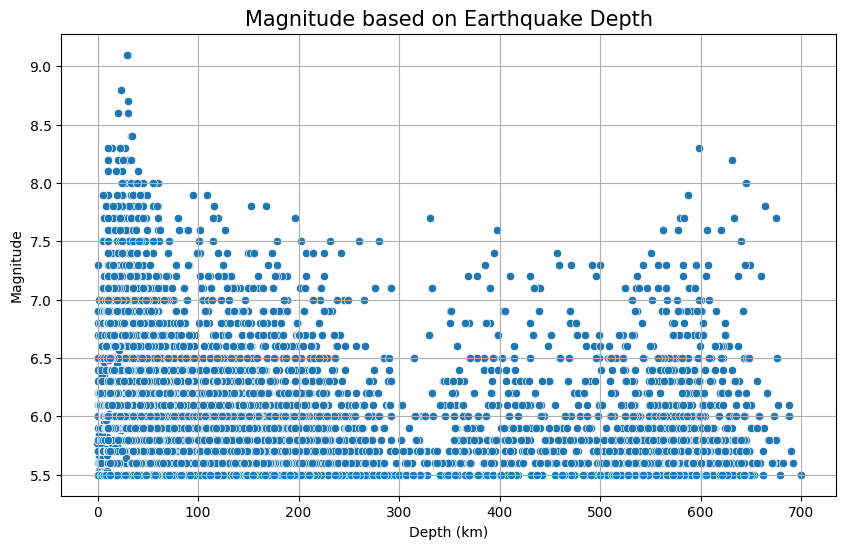

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=earthquake_df, x='Depth', y='Magnitude')
plt.title('Magnitude based on Earthquake Depth', fontsize=15)
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

# **Conclusion**

In this Exploratory Data Analysis (EDA) project on Earthquake data, we examined various aspects such as **regions prone to earthquakes, frequency distribution, magnitude and depth trends,** and **location sources**. The key takeaways from the analysis are:

- **Top earthquake-prone regions** and countries were identified, helping to understand geographical vulnerability.

- **A high frequency** of earthquakes was observed in regions like Alaska, Indonesia, and Japan, indicating seismic hotspots.

- **The magnitude distribution** revealed that while most earthquakes are of lower intensity (below 5.0), some extreme cases were found in deeper regions.

- **Depth vs. Magnitude** scatter plots suggest that deeper earthquakes are less frequent but can still reach high magnitudes.

- **Location sources** like USGS and other seismic networks contributed most of the reliable data, helping in accurate mapping.

- **Heatmaps and line plots** offered visual insights into the spatial and temporal distribution of earthquakes globally.

This analysis provides a strong foundation for further research and can assist authorities and researchers in improving **earthquake preparedness, risk assessment**, and **early warning systems**. Data-driven insights like these are crucial in saving lives and minimizing damage from future seismic events.